<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Polinomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [34]:
# import dataset
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-tax-gnp-bd.csv'
df = pd.read_csv(url)
df.head()

,YEAR,GNP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

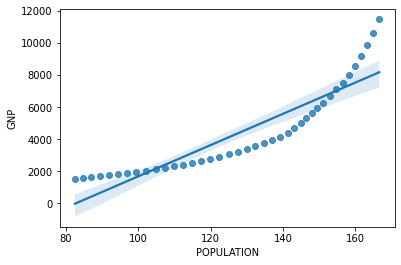

In [3]:
# let's graph a regression plot
sns.regplot(data=df, x=df['POPULATION'], y=df['GNP'])

### Dataset looks like Exponential.
-- need to implement Non Linear/ polinomial Regression 

<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

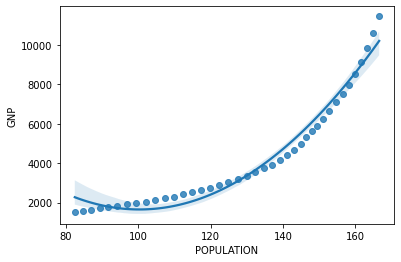

In [4]:
# let's try 2 degree order Polinomial function on dataset
sns.regplot(data=df, x=df['POPULATION'], y=df['GNP'], order=2)

<AxesSubplot:xlabel='POPULATION', ylabel='GNP'>

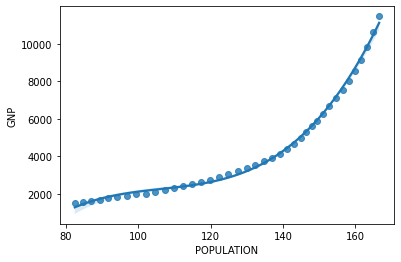

In [5]:
# let's try 2 degree order Polinomial function on dataset
sns.regplot(data=df, x=df['POPULATION'], y=df['GNP'], order=3)

3 Degree Order Polinomial Function is fit the data erfectly in regression line.

# let's transform our data with 3 degree order for polinomial regression

In [35]:
x = df['POPULATION'].values.reshape(-1,1)
y = df['GNP'].values.reshape(-1,1)
x_train, y_train, x_test, y_test = train_test_split(x, y, test_size=0.20, random_state=2)
#  The random state hyperparameter in the train_test_split() function controls the shuffling process.
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)

x_train_trans = pf.fit_transform(x)
x_test_trans = pf.fit_transform(x_test)  

পলিনমিয়াল রিগ্রেশনের জন্য আলাদা কোন ফাংশন নেই। ডেটাকে ট্রান্সফরমেশনের মাধ্যমে পলিনমিয়াল ফিচার সেট করে , লিনিয়ার ফাংশনের মাধ্যমেই পাইথনে পলিনমিয়াল রিগ্রেশন করা হয়। 

In [21]:
poly = LinearRegression()
poly.fit(x_train_trans, y)


LinearRegression()

In [36]:
# আমাদের মডেল এখন তৈরি। এবার অ্যাকুরেসি চেক করার পালা।
#defining prediction data frame 
predictions = poly.predict(x_test_trans)


In [39]:
print('Coefficients:', poly.coef_)
print('Intercept:', poly.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = poly.score(x_test_trans,y_test)

Coefficients: [[ 0.00000000e+00  1.20802698e+03 -1.11503188e+01  3.49081200e-02]]
Intercept: [-42077.21061321]


ValueError: ignored

## Polynomial Regression With One Variable

In [40]:
# Step 1: Import all the libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

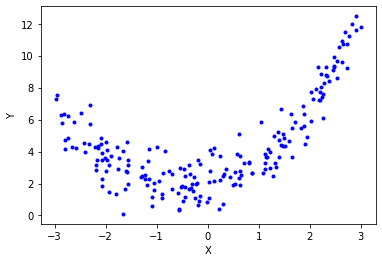

In [41]:
# Step 2: Create and visualize the data


X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [42]:
# Step 3: Split data in the train and test set

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [51]:
# Step 4: Apply simple linear regression

lr = LinearRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
print(r2_score(y_test, predictions))

0.19528684058998125


In [52]:
print(lr.coef_)
print(lr.intercept_)

[[0.92318377]]
[4.37242666]


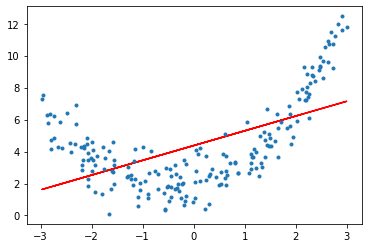

In [48]:
plt.plot(x_train, lr.predict(x_train), color='red')
plt.plot(X, y, '.')
plt.xlabel('X')
plt.ylabel('y')


In [53]:
# Step 5: Apply polynomial regression
# applying polynomial regression degree 2

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
predictions = lr.predict(x_test_trans)
print(r2_score(y_test, predictions))

0.8703831638639136


In [54]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8388897  0.81781013]]
[1.95346012]


If we visualize the predicted line across the training data points, we can see how well it identifies the non-linear relationship in data.

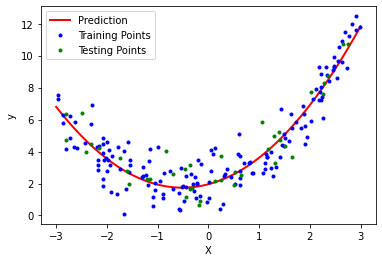

In [56]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.fit_transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Prediction')
plt.plot(x_train, y_train, 'b.', label='Training Points')
plt.plot(x_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

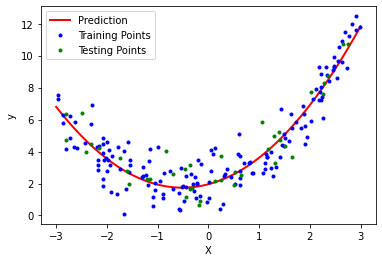

In [57]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Prediction')
plt.plot(x_train, y_train, 'b.', label='Training Points')
plt.plot(x_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()